In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression

# стандартизация
from sklearn.preprocessing import StandardScaler

# метрики
from sklearn.metrics import (accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)

# регуляризация
from sklearn.linear_model import Lasso, Ridge

import warnings
warnings.filterwarnings('ignore')

/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Ваша задача — построить модель машинного обучения для предсказания целевой переменной на примере датасета ирисы Фишера. 
* В процессе выполнения задания вы должны применить концепции переобучения и недообучения, кросс-валидации, регуляризации (L1 и L2), а также оценить способность вашей модели к обобщению.

### Предварительная обработка данных.
* Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
* Разделите данные на тренировочный и тестовый наборы.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# sepal length - длина чашелистика
# sepal width  - ширина чашелистика
# petal length - длина лепестка
# petal width  - ширина лепестка

In [6]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [7]:
df_iris['target'] = iris.target

In [8]:
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
53,5.5,2.3,4.0,1.3,1
137,6.4,3.1,5.5,1.8,2
55,5.7,2.8,4.5,1.3,1
111,6.4,2.7,5.3,1.9,2
61,5.9,3.0,4.2,1.5,1


In [9]:
df_iris['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [10]:
# Выборка сбалансировна

In [11]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
df_iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [13]:
# Пропусков нет

In [14]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


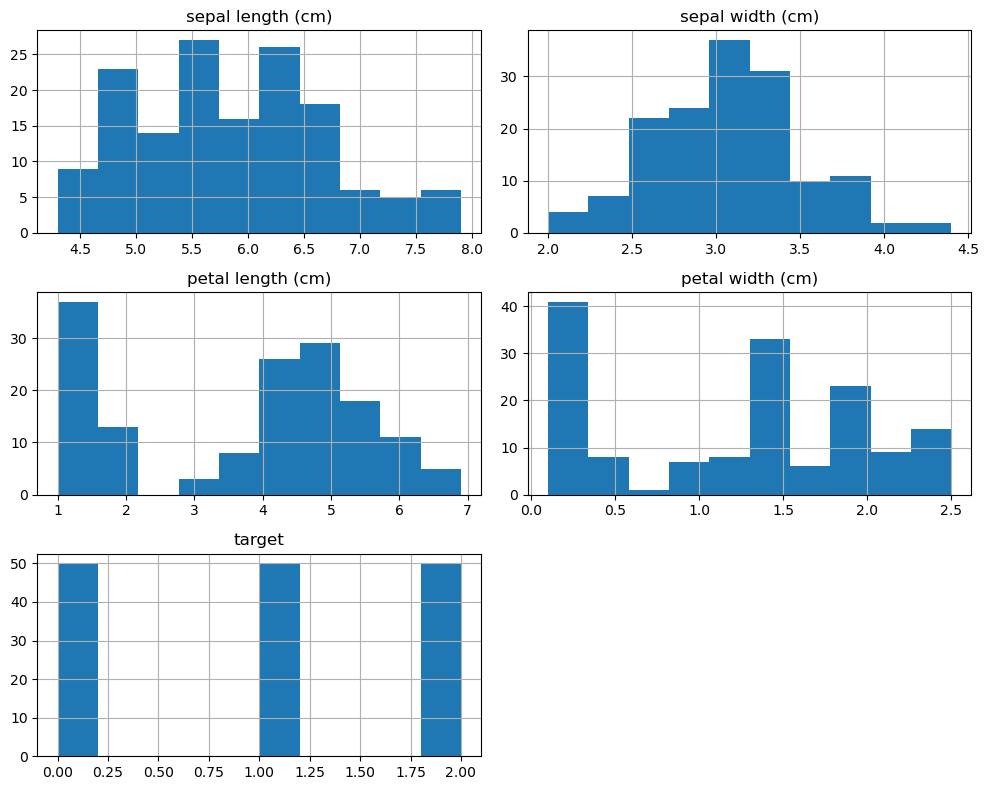

In [15]:
# Генерируем гистограммы для всех числовых столбцов в DataFrame
df_iris.hist(figsize=(10, 8), bins=10)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.grid(alpha=0.3)
plt.show()

In [16]:
X = df_iris.drop('target', axis=1)
Y = df_iris['target']

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=30, random_state=42, shuffle=True)

In [17]:
X_train.shape, y_test.shape

((120, 4), (30,))

### 2. Обучение модели.
* Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
* Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

In [18]:
model = LogisticRegression(penalty='none', solver='saga') # без регуляризации

model.fit(X_train, y_train)

predictions_no_reg = model.predict(X_train)
print('TRAIN')
print(classification_report(y_train, predictions_no_reg))

TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120



In [19]:
predictions_no_reg = model.predict(X_test) # без регуляризации
print('TEST')
print(classification_report(y_test, predictions_no_reg))

TEST
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
# Полученные данные свидетельствовуют о переобучении

In [21]:
# Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

# Однократная оценка на тестовых данных
single_score = accuracy_score(y_test, model.predict(X_test))
print("Однократная оценка эффективности (accuracy):", single_score)

# 5-кратная кросс-валидация на всем датасете
cross_val_scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='accuracy')
print("Среднее значение accuracy по 5-кратной кросс-валидации:", cross_val_scores.mean())

scores_10 = cross_val_score(model, X_scaled, Y, cv=10, scoring='accuracy')
print("Среднее значение accuracy при 10-кратной кросс-валидации:", scores_10.mean())

Однократная оценка эффективности (accuracy): 1.0
Среднее значение accuracy по 5-кратной кросс-валидации: 0.9733333333333334
Среднее значение accuracy при 10-кратной кросс-валидации: 0.9800000000000001


Однократная оценка - свидетельствовуют о сильном переобучении

Модель обучается на некоторых из этих фолдов и валидируется на оставшихся, процесс повторяется несколько раз с разными наборами фолдов. Это позволяет использовать все доступные данные как для обучения, так и для валидации модели, предоставляя более обобщённую оценку её качества.

In [22]:
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

In [23]:
models = []
coefs = []
models.append(LogisticRegression(penalty='none').fit(X_train, y_train))

for a in alphas:
    model_reg_l1 = LogisticRegression(penalty='l1', solver='saga', C=1/a).fit(X_train, y_train)
    models.append(model_reg_l1)
    coefs.append(model_reg_l1.coef_)

In [24]:
for a in alphas:
    model_reg_l_2 = LogisticRegression(penalty='l2', solver='saga', C=1/a).fit(X_train, y_train)
    models.append(model_reg_l_2)
    coefs.append(model_reg_l_2.coef_)

In [25]:
coefs[0].shape

(3, 4)

In [26]:
models

[LogisticRegression(penalty='none'),
 LogisticRegression(C=100.0, penalty='l1', solver='saga'),
 LogisticRegression(C=10.0, penalty='l1', solver='saga'),
 LogisticRegression(penalty='l1', solver='saga'),
 LogisticRegression(C=0.1, penalty='l1', solver='saga'),
 LogisticRegression(C=0.01, penalty='l1', solver='saga'),
 LogisticRegression(C=100.0, solver='saga'),
 LogisticRegression(C=10.0, solver='saga'),
 LogisticRegression(solver='saga'),
 LogisticRegression(C=0.1, solver='saga'),
 LogisticRegression(C=0.01, solver='saga')]

In [27]:
scores = []
scores.append(
    
        {
            'alpha': 'no',
            'penalty': 'no',
            'train_acc': models[0].score(X_train, y_train),
            'test_acc': models[0].score(X_test, y_test)
        }
    )

In [28]:
for i, m in enumerate(models[1:6]):
    alpha = alphas[i]
    scores.append(
        
        {
            'alpha': alpha,
            'penalty': m.penalty,
            'train_acc': m.score(X_train, y_train),
            'test_acc': m.score(X_test, y_test)
        }
    )

In [29]:
for i, m in enumerate(models[6:]):
    alpha = alphas[i]
    scores.append(
        {
            'alpha': alpha,
            'penalty': m.penalty,
            'train_acc': m.score(X_train, y_train),
            'test_acc': m.score(X_test, y_test)
        }
    )

In [30]:
results_score = pd.DataFrame(scores)
results_score

,alpha,penalty,train_acc,test_acc
0,no,no,0.983333,1.000000
1,0.01,l1,0.975000,1.000000
2,0.1,l1,0.975000,1.000000
3,1.0,l1,0.975000,1.000000
4,10.0,l1,0.950000,0.966667
5,100.0,l1,0.333333,0.333333
6,0.01,l2,0.975000,1.000000
7,0.1,l2,0.975000,1.000000
8,1.0,l2,0.975000,1.000000
9,10.0,l2,0.975000,1.000000


In [31]:
# Для модели без регуляризации accuracy = 1.0. - Модель идеально подстроилась под тестовые данные, но не обязательно будет хорошо работать на новых данных
# Для L1-регуляризации параметром оптимизатора solver='saga' и alpha = 10 значение accuracy достигает наилучшего результата почти 0.97
# Для L2-регуляризации параметром оптимизатора solver='saga' и alpha = 100 значение accuracy достигает наилучшего результата почти 0.93

### 3. Анализ результатов.
* Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
* Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?

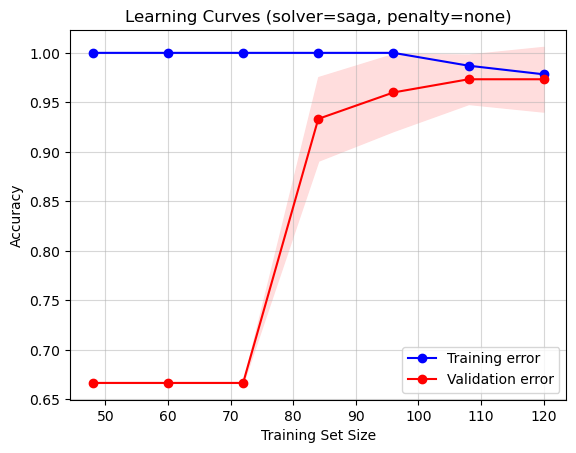

In [32]:
# модель без ругуляризации
model_no_reg = LogisticRegression(penalty='none', solver='saga')

# Получение кривых обучения
train_sizes, train_scores, validation_scores = learning_curve(
                                                              estimator=model_no_reg,
                                                              X=X_scaled,
                                                              y=Y,
                                                              train_sizes=np.linspace(0.1, 1.0, 10),
                                                              cv=5,
                                                              scoring='accuracy'
                                                             )

# Средние значения и стандартное отклонение ошибок обучения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Средние значения и стандартное отклонение ошибок валидации
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Построение графиков
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='#FFDDDD')
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training error')
plt.plot(train_sizes, validation_mean, 'o-', color='r', label='Validation error')

plt.title('Learning Curves (solver=saga, penalty=none)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

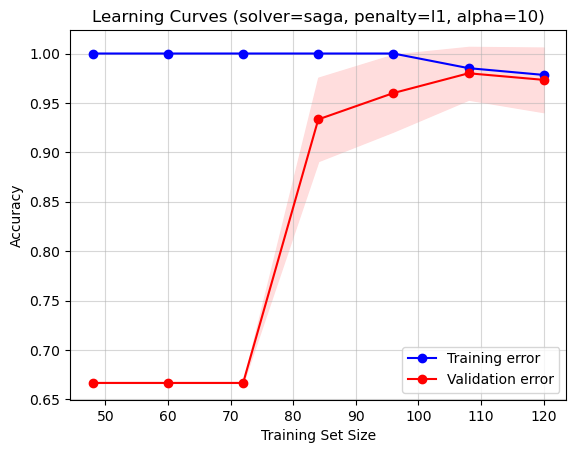

In [33]:
# модель с ругуляризацией l1
model_reg_l1 = LogisticRegression(C=10, solver='saga', penalty='l1')

# Получение кривых обучения
train_sizes, train_scores, validation_scores = learning_curve(
                                                              estimator=model_reg_l1,
                                                              X=X_scaled,
                                                              y=Y,
                                                              train_sizes=np.linspace(0.1, 1.0, 10),
                                                              cv=5,
                                                              scoring='accuracy'
                                                             )

# Средние значения и стандартное отклонение ошибок обучения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Средние значения и стандартное отклонение ошибок валидации
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Построение графиков
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='#FFDDDD')
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training error')
plt.plot(train_sizes, validation_mean, 'o-', color='r', label='Validation error')

plt.title('Learning Curves (solver=saga, penalty=l1, alpha=10)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

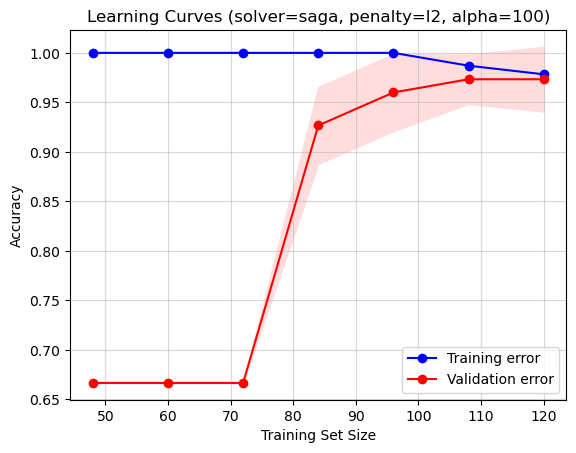

In [34]:
# модель с ругуляризацией l1
model_reg_l2 = LogisticRegression(C=100, solver='saga', penalty='l2')

# Получение кривых обучения
train_sizes, train_scores, validation_scores = learning_curve(
                                                              estimator=model_reg_l2,
                                                              X=X_scaled,
                                                              y=Y,
                                                              train_sizes=np.linspace(0.1, 1.0, 10),
                                                              cv=5,
                                                              scoring='accuracy'
                                                             )

# Средние значения и стандартное отклонение ошибок обучения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Средние значения и стандартное отклонение ошибок валидации
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Построение графиков
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='#FFDDDD')
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training error')
plt.plot(train_sizes, validation_mean, 'o-', color='r', label='Validation error')

plt.title('Learning Curves (solver=saga, penalty=l2, alpha=100)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [35]:
# На маленьком размере обучающей выборке 45-75, ошибка на валидации большая, и уменашается при увеличении обучающей выборке. Ошибка на обучающей
# низкая, что свидетельствует о переобучении на мальньких данных.

# Далее после 80 ошибки начинают сходится (на валидации и обуч. выборке). 
# С учетом роста данных поведение модели улчшается.